# 회귀분석
* 지도학습
* 종속변수(target) 변수가 수치형 자료
* 집값, 보험료, 몸무게 과 같이 연속적인 숫자로 이루어진 값을 예측
* 회귀? => 평균으로 돌아간다.

단순 선형 회귀분석 / 다중 선형 회귀분석
* 단순 선형 회귀분석: 독립변수1, 종속변수1
* 다중 선형 회귀분석: 독립변수n, 종속변수1

1) 단순 회귀 분석: 자동차 배기량과 연비 회귀 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import koreanize_matplotlib

In [2]:
# X는 자동차 배기량, y는 연비
X = np.array([1, 1.4, 1.6, 2, 2.2, 2.4, 3, 3.3, 3.6]) 
y = np.array([15, 13, 13, 12, 11, 10.5, 10, 9, 8])

# 상수 추가 y절편 추가
X_with_const = sm.add_constant(X)

# 모델 훈련
model = sm.OLS(y, X_with_const).fit()
y_pred = model.predict(X_with_const)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     203.7
Date:                Mon, 01 Dec 2025   Prob (F-statistic):           1.97e-06
Time:                        11:19:52   Log-Likelihood:                -3.9965
No. Observations:                   9   AIC:                             11.99
Df Residuals:                       7   BIC:                             12.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8291      0.414     40.626      0.0

C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


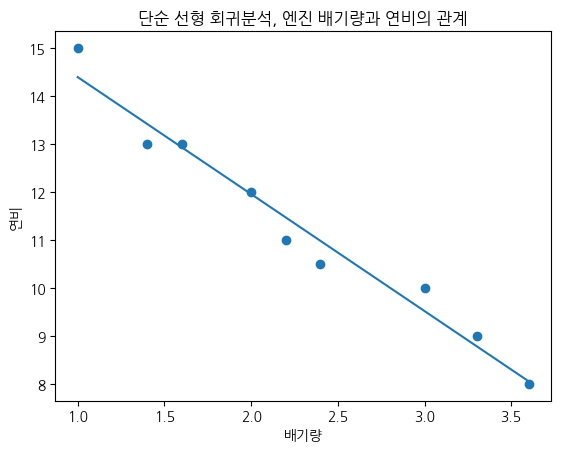

In [3]:
plt.scatter(X, y)
plt.plot(X, y_pred)
plt.title("단순 선형 회귀분석, 엔진 배기량과 연비의 관계")
plt.xlabel("배기량")
plt.ylabel("연비")
plt.show()

* R-qeuared: 0.967로 약 96%를 설명한다.
* p-value: 1.97e-06 로 매우작다.(0.001이하, 0.05) 통계적으로 유의미하다
* X1의 회귀계수(coefficient-coef)는 -2.4371
* y절편(상수항)은 16.8291
* 따라서 추정되는 회귀식은 y(연비) = -2.4371 * X1 + 16.8291

# 다중 회귀 분석
* 독립변수가 여러 개인 데이터


In [4]:
# 데이터
yard = np.array([31, 31, 27, 39, 30, 32, 28, 23, 28, 35])
area = np.array([58, 51, 47, 35, 48, 42, 43, 56, 41, 41])
park = np.array([1, 1, 5, 5, 2, 4, 5, 1, 1, 3])
dist = np.array([492, 426, 400, 125, 443, 412, 201, 362, 192, 423])
price = np.array([12631,12084,12220,15649,11486,12276,15527,12666,13180,10169])

In [5]:
pd.DataFrame(dict(yard=yard, area=area, park=park, dist=dist))

,yard,area,park,dist
0,31,58,1,492
1,31,51,1,426
2,27,47,5,400
3,39,35,5,125
4,30,48,2,443
5,32,42,4,412
6,28,43,5,201
7,23,56,1,362
8,28,41,1,192
9,35,41,3,423


In [6]:
# 독립 변수와 종속 변수 설정
X = pd.DataFrame(dict(yard=yard, area=area, park=park, dist=dist))
y = price

In [7]:
X = sm.add_constant(X)
X

,const,yard,area,park,dist
0,1.0,31,58,1,492
1,1.0,31,51,1,426
2,1.0,27,47,5,400
3,1.0,39,35,5,125
4,1.0,30,48,2,443
5,1.0,32,42,4,412
6,1.0,28,43,5,201
7,1.0,23,56,1,362
8,1.0,28,41,1,192
9,1.0,35,41,3,423


In [8]:
## 훈련
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     14.07
Date:                Mon, 01 Dec 2025   Prob (F-statistic):            0.00627
Time:                        11:42:23   Log-Likelihood:                -75.420
No. Observations:                  10   AIC:                             160.8
Df Residuals:                       5   BIC:                             162.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3045.6891   4084.218      0.746      0.4

C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


1차 분석 결과에서 yard는 p-value가 0.05 보다 컸기 때문에 분석에서 제외

In [9]:
X2 = pd.DataFrame(dict(yard=yard, area=area, park=park, dist=dist))
X2 = X2[['area', 'park', 'dist']]
X2_const = sm.add_constant(X2)
X2_const

,const,area,park,dist
0,1.0,58,1,492
1,1.0,51,1,426
2,1.0,47,5,400
3,1.0,35,5,125
4,1.0,48,2,443
5,1.0,42,4,412
6,1.0,43,5,201
7,1.0,56,1,362
8,1.0,41,1,192
9,1.0,41,3,423


In [10]:
## 훈련
model2 = sm.OLS(y, X2_const).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     12.92
Date:                Mon, 01 Dec 2025   Prob (F-statistic):            0.00499
Time:                        11:42:27   Log-Likelihood:                -77.902
No. Observations:                  10   AIC:                             163.8
Df Residuals:                       6   BIC:                             165.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9242.3046   2545.393      3.631      0.0

C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


In [11]:
X3_const = X2_const.drop('park', axis=1)
X3_const

,const,area,dist
0,1.0,58,492
1,1.0,51,426
2,1.0,47,400
3,1.0,35,125
4,1.0,48,443
5,1.0,42,412
6,1.0,43,201
7,1.0,56,362
8,1.0,41,192
9,1.0,41,423


In [12]:
## 훈련
model3 = sm.OLS(y, X3_const).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     10.58
Date:                Mon, 01 Dec 2025   Prob (F-statistic):            0.00766
Time:                        11:42:30   Log-Likelihood:                -80.990
No. Observations:                  10   AIC:                             168.0
Df Residuals:                       7   BIC:                             168.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.351e+04   2158.546      6.258      0.0

C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


# 다중 회귀분석의 회귀식
* y = (92.9476 * area) + (-14.4217 * dist) + 1.351e+04
* 모델의 설명력은 R-squared가 아닌 Adj-R-squared를 봐야 함.0.680
* 모델의 p-value: 0.00766 이므로 0.05보다 작음

# 변수 선택
* 전진선택법: 독립변수 0부터 시작해서 변수를 1개씩 추가
* 후진제거법: 모든 독변수를 다 포함 => 변수를 1개씩 삭제
* 다중선택법: 전진 + 후진
* AIC: 변수를 선택하는 지표

In [13]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

In [14]:
# 데이터 생성
yard = np.array([31, 31, 27, 39, 30, 32, 28, 23, 28, 35])
area = np.array([58, 51, 47, 35, 48, 42, 43, 56, 41, 41])
park = np.array([1, 1, 5, 5, 2, 4, 5, 1, 1, 3])
dist = np.array([492, 426, 400, 125, 443, 412, 201, 362, 192, 423])
popul = np.array([4412, 2061, 4407, 1933, 4029, 4180, 3444, 1683, 3020, 4459])
price = np.array([12631, 12084, 12220, 15649, 11486, 12276, 15527, 12666, 13180, 10169])

# 데이터프레임 생성
data = pd.DataFrame({'yard': yard, 'area': area, 'park': park, 'dist': dist, 'popul': popul, 'price': price})

In [15]:
data

,yard,area,park,dist,popul,price
0,31,58,1,492,4412,12631
1,31,51,1,426,2061,12084
2,27,47,5,400,4407,12220
3,39,35,5,125,1933,15649
4,30,48,2,443,4029,11486
5,32,42,4,412,4180,12276
6,28,43,5,201,3444,15527
7,23,56,1,362,1683,12666
8,28,41,1,192,3020,13180
9,35,41,3,423,4459,10169


In [16]:
# 독립변수와 종속변수 설정
X = data.drop('price', axis=1)
y = data['price']

In [17]:
X

,yard,area,park,dist,popul
0,31,58,1,492,4412
1,31,51,1,426,2061
2,27,47,5,400,4407
3,39,35,5,125,1933
4,30,48,2,443,4029
5,32,42,4,412,4180
6,28,43,5,201,3444
7,23,56,1,362,1683
8,28,41,1,192,3020
9,35,41,3,423,4459


In [18]:
y

0    12631
1    12084
2    12220
3    15649
4    11486
5    12276
6    15527
7    12666
8    13180
9    10169
Name: price, dtype: int64

In [19]:
# 전진 선택법을 사용한 회귀분석
model = LinearRegression()
sfs = SequentialFeatureSelector(model, direction='forward')
sfs.fit(X, y)
# 선택된 변수
selected_features = X.columns[sfs.get_support()]
selected_features

Index(['yard', 'park'], dtype='object')

In [20]:
# 최종 선택된 변수로 분석
X_selected = sm.add_constant(data[selected_features])
X_selected

,const,yard,park
0,1.0,31,1
1,1.0,31,1
2,1.0,27,5
3,1.0,39,5
4,1.0,30,2
5,1.0,32,4
6,1.0,28,5
7,1.0,23,1
8,1.0,28,1
9,1.0,35,3


In [37]:
final_model = sm.OLS(y, X_selected).fit()
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                 -0.036
Method:                 Least Squares   F-statistic:                    0.8433
Date:                Wed, 07 May 2025   Prob (F-statistic):              0.470
Time:                        15:23:41   Log-Likelihood:                -86.871
No. Observations:                  10   AIC:                             179.7
Df Residuals:                       7   BIC:                             180.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.22e+04   3990.829      3.056      0.0

C:\Users\haram\miniforge3\envs\fintech\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)
